In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import pickle
import datetime 
import warnings
import sys
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)

# from ClassFunctions_OtherRes import precip_time_series, rainfall_analysis
from PlottingFunctions import *

temp_res = 60

# For each file which has a 5 minute pickle file
for pickle_str in os.listdir(f'/nfs/a319/gy17m2a/MetricEvaluation/DanishRainDataPickles/')[66:67]:
    
    if 'svk' in pickle_str:
        directory = 'DanishRainData_SVK'
    else:
        directory = 'DanishRainData'    
    
    if 'svk' not in pickle_str:
    
        all_events = []

        file_name = pickle_str.split('.pkl')[0]
        if os.path.isfile(f"/nfs/a319/gy17m2a/MetricEvaluation/DanishRainData_Outputs/{temp_res}mins/All_events_new_{file_name}"):
            print("is file")
        else:
            print("is not file")

In [24]:
# from datetime import timedelta

# all_events_5mins = []
# all_events_10mins = []
# all_events_30mins = []
# all_events_60mins = []

# for file in os.listdir("../DanishRainData_Outputs/5mins/"):

#     # Load all resolutions
#     df_5m = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
#     df_10m = pd.read_csv(f"../DanishRainData_Outputs/10mins/{file}")
#     df_30m = pd.read_csv(f"../DanishRainData_Outputs/30mins/{file}")
#     df_60m = pd.read_csv(f"../DanishRainData_Outputs/60mins/{file}")

# #     # Assign event numbers if not already there
# #     df_5m['event_num'] = df_5m.index
# #     df_10m['event_num'] = df_10m.index
# #     df_30m['event_num'] = df_30m.index
# #     df_60m['event_num'] = df_60m.index

#     # Find common event numbers across all resolutions (based on 60-min reference)
#     common_events = set(df_60m['event_num']) & set(df_30m['event_num']) & set(df_10m['event_num']) & set(df_5m['event_num'])

#     # Filter all dataframes
#     df_5m = df_5m[df_5m['event_num'].isin(common_events)].reset_index(drop=True)
#     df_10m = df_10m[df_10m['event_num'].isin(common_events)].reset_index(drop=True)
#     df_30m = df_30m[df_30m['event_num'].isin(common_events)].reset_index(drop=True)
#     df_60m = df_60m[df_60m['event_num'].isin(common_events)].reset_index(drop=True)

#     print(f"{file}: kept {len(df_5m)} events after filtering")

#     # Sanity check: ensure alignment within 60 minutes
#     for i in range(len(df_5m)):
#         for res_name, df in zip(["10m", "30m", "60m"], [df_10m, df_30m, df_60m]):
#             start_diff = abs(pd.to_datetime(df_5m.loc[i, 'start_time']) - pd.to_datetime(df.loc[i, 'start_time']))
#             end_diff = abs(pd.to_datetime(df_5m.loc[i, 'end_time']) - pd.to_datetime(df.loc[i, 'end_time']))

#             if start_diff > timedelta(minutes=60) or end_diff > timedelta(minutes=60):
#                 print(f"⚠️ {file} - Mismatch with {res_name} at index {i}:")
#                 print(f"   5m start: {df_5m.loc[i, 'start_time']}, {res_name} start: {df.loc[i, 'start_time']}")
#                 print(f"   5m end  : {df_5m.loc[i, 'end_time']}, {res_name} end  : {df.loc[i, 'end_time']}")
#                 print(f"   Δ start: {start_diff}, Δ end: {end_diff}")

#     # Append to master lists
#     all_events_5mins.append(df_5m)
#     all_events_10mins.append(df_10m)
#     all_events_30mins.append(df_30m)
#     all_events_60mins.append(df_60m)

# # Concatenate all results
# all_events_df_5mins = pd.concat(all_events_5mins).reset_index(drop=True)
# all_events_df_10mins = pd.concat(all_events_10mins).reset_index(drop=True)
# all_events_df_30mins = pd.concat(all_events_30mins).reset_index(drop=True)
# all_events_df_60mins = pd.concat(all_events_60mins).reset_index(drop=True)

# print(f"Total aligned events: {len(all_events_df_5mins)}")


In [ ]:
all_events_5mins =[]
all_events_10mins =[]
all_events_30mins =[]
all_events_60mins =[]

print(len(os.listdir("../DanishRainData_Outputs/5mins/")))
for num, file in enumerate(os.listdir("../DanishRainData_Outputs/5mins/")):
    # Get 5 mintue data
    df_5m = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
    df_5m['event_num']=df_5m.index
    
    df_10m = pd.read_csv(f"../DanishRainData_Outputs/{10}mins/{file}")
    df_30m = pd.read_csv(f"../DanishRainData_Outputs/{30}mins/{file}")
    df_60m = pd.read_csv(f"../DanishRainData_Outputs/{60}mins/{file}")
    
   # Find common event numbers in all four
    common_event_nums = (
        set(df_5m['event_num']) &
        set(df_10m['event_num']) &
        set(df_30m['event_num']) &
        set(df_60m['event_num'])
    )

    # Filter all DataFrames to only include common events
    df_5m = df_5m[df_5m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_10m = df_10m[df_10m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_30m = df_30m[df_30m['event_num'].isin(common_event_nums)].reset_index(drop=True)
    df_60m = df_60m[df_60m['event_num'].isin(common_event_nums)].reset_index(drop=True)

    print(f"{num} : {file}: {len(common_event_nums)} events retained across all resolutions")    

    # Collect DataFrames into a dictionary for easy iteration
    dfs = {'5m': df_5m,
        '10m': df_10m,
        '30m': df_30m,
        '60m': df_60m}

    # Loop through rows (assuming event_num alignment)
    for i in range(len(df_5m)):
        reference_start = pd.to_datetime(df_5m.iloc[i]['start_time'])
        reference_end = pd.to_datetime(df_5m.iloc[i]['end_time'])
        # print(reference_start,reference_end)
        for res, df in dfs.items():
            start = pd.to_datetime(df.iloc[i]['start_time'])
            end = pd.to_datetime(df.iloc[i]['end_time'])
            #print(res, start, end)

            delta_start = abs(start - reference_start)
            delta_end = abs(end - reference_end)

            if delta_start > timedelta(minutes=60):
                print(f"⚠️ START mismatch in {res} at index {i}")
                print(f"   {res} start: {start}, 5m start: {reference_start}, Δ: {delta_start}")

            if delta_end > timedelta(minutes=60):
                print(f"⚠️ END mismatch in {res} at index {i}")
                print(f"   {res} end: {end}, 5m end: {reference_end}, Δ: {delta_end}")

        all_events_5mins.append(df_5m)
        if temp_res == 30:
            all_events_30mins.append(df_10m)
        if temp_res == 10:
            all_events_30mins.append(df_30m)     
        if temp_res == 60:
            all_events_60mins.append(df_60m)            

# all_events_df_5mins = pd.concat(all_events_5mins)   
# all_events_df_30mins = pd.concat(all_events_30mins)   
# print(len(all_events_df_5mins), len(all_events_df_30mins))
# all_events_df_30mins.reset_index(inplace=True,drop=True)

346
All_events_5413_svk_precip_minute.csv: 172 events retained across all resolutions
All_events_610400_precip_minute.csv: 859 events retained across all resolutions
All_events_598120_precip_minute.csv: 136 events retained across all resolutions
All_events_5411_svk_precip_minute.csv: 1124 events retained across all resolutions
All_events_588920_precip_minute.csv: 816 events retained across all resolutions
All_events_5555_svk_precip_minute.csv: 971 events retained across all resolutions
All_events_5653_svk_precip_minute.csv: 447 events retained across all resolutions
All_events_5052_svk_precip_minute.csv: 2423 events retained across all resolutions
All_events_5990_svk_precip_minute.csv: 2107 events retained across all resolutions
All_events_611900_precip_minute.csv: 521 events retained across all resolutions
All_events_5587_svk_precip_minute.csv: 43 events retained across all resolutions
All_events_540020_precip_minute.csv: 895 events retained across all resolutions
All_events_5418_svk_

All_events_5429_svk_precip_minute.csv: 1132 events retained across all resolutions
All_events_5115_svk_precip_minute.csv: 1814 events retained across all resolutions
All_events_510520_precip_minute.csv: 1040 events retained across all resolutions
All_events_5234_svk_precip_minute.csv: 14 events retained across all resolutions
All_events_5680_svk_precip_minute.csv: 1297 events retained across all resolutions
All_events_5775_svk_precip_minute.csv: 2854 events retained across all resolutions
All_events_598620_precip_minute.csv: 955 events retained across all resolutions
All_events_516020_precip_minute.csv: 814 events retained across all resolutions
All_events_5061_svk_precip_minute.csv: 2745 events retained across all resolutions
All_events_551020_precip_minute.csv: 928 events retained across all resolutions
All_events_5273_svk_precip_minute.csv: 853 events retained across all resolutions
All_events_5540_svk_precip_minute.csv: 2831 events retained across all resolutions
All_events_5427_sv

In [56]:
all_events_5mins =[]
all_events_10mins =[]
all_events_30mins =[]
all_events_60mins =[]

for file in os.listdir("../DanishRainData_Outputs/5mins/")[:10]:
    # Get 5 mintue data
    df_5mins = pd.read_csv(f"../DanishRainData_Outputs/5mins/{file}")
    # df_5mins['event_num']=range(0, len(df))
    df_5mins['event_num']=df_5mins.index
    
    
    
    for temp_res in [10,30,60]: 
    
        # Get 60 minute data
        df_this_res = pd.read_csv(f"../DanishRainData_Outputs/{temp_res}mins/{file}")
        
        # Join, and get rid of events not present in 30 minute data
        df_5mins_filt = df_5mins.copy()
        df_5mins_filt = df_5mins_filt[df_5mins_filt['event_num'].isin(df_this_res['event_num'])]
        df_5mins_filt.reset_index(inplace=True, drop=True)
        print(file, len(df_5mins_filt), len(df_this_res))

        for i in range(len(df_5mins_filt)):
            start_this_res = pd.to_datetime(df_this_res.iloc[i]['start_time'])
            start_5m = pd.to_datetime(df_5mins_filt.iloc[i]['start_time'])
            delta_start = abs(start_this_res - start_5m)

            end_this_res = pd.to_datetime(df_this_res.iloc[i]['end_time'])
            end_5m = pd.to_datetime(df_5mins_filt.iloc[i]['end_time'])
            delta_end = abs(end_this_res - end_5m)
            # print(delta_end)

            if delta_start > timedelta(minutes=60):
                print(f"⚠️ Mismatch at index {i}:")
                print(f"  30-min start: {start_this_res}")
                print(f"  5-min start : {start_5m}")
                print(f"  Difference  : {delta_start}")

            if delta_end > timedelta(minutes=60):
                print(f"⚠️ Mismatch at index {i}:")
                print(f"  30-min start: {end_this_res}")
                print(f"  5-min start : {start_5m}")
                print(f"  Difference  : {delta_end}")

        all_events_5mins.append(df_5mins_filt)
        if temp_res == 30:
            all_events_30mins.append(df_this_res)
        if temp_res == 10:
            all_events_30mins.append(df_this_res)     
        if temp_res == 60:
            all_events_60mins.append(df_this_res)            

all_events_df_5mins = pd.concat(all_events_5mins)   
all_events_df_30mins = pd.concat(all_events_30mins)   
print(len(all_events_df_5mins), len(all_events_df_30mins))

all_events_df_30mins.reset_index(inplace=True,drop=True)

All_events_5413_svk_precip_minute.csv 208 208
All_events_5413_svk_precip_minute.csv 202 202
All_events_5413_svk_precip_minute.csv 172 172
All_events_610400_precip_minute.csv 929 929
All_events_610400_precip_minute.csv 910 910
All_events_610400_precip_minute.csv 860 860
All_events_598120_precip_minute.csv 147 147
All_events_598120_precip_minute.csv 140 140
All_events_598120_precip_minute.csv 136 136
All_events_5411_svk_precip_minute.csv 1372 1372
All_events_5411_svk_precip_minute.csv 1279 1279
All_events_5411_svk_precip_minute.csv 1124 1124
All_events_588920_precip_minute.csv 911 911
All_events_588920_precip_minute.csv 874 874
All_events_588920_precip_minute.csv 819 819
All_events_5555_svk_precip_minute.csv 1246 1246
All_events_5555_svk_precip_minute.csv 1129 1129
All_events_5555_svk_precip_minute.csv 971 971
All_events_5653_svk_precip_minute.csv 543 543
All_events_5653_svk_precip_minute.csv 505 505
All_events_5653_svk_precip_minute.csv 447 447
All_events_5052_svk_precip_minute.csv 2908

### --------- 

### Get a version with just the 'raw' versions of the metrics

In [28]:
raw_cols = []
for col in all_events_df_5mins.columns:
    if not col.endswith('_DMC_10') and not col.endswith('dblnorm'):
        raw_cols.append(col)
        
unneeded_cols = ['gauge_num',  'start_time', 'end_time','total_precip', 'peak_mean_ratio_scaled',
                'frac_q1', 'frac_q2', 'frac_q3', 'frac_q4',]       
raw_cols = [x for x in raw_cols if x not in unneeded_cols]      
        
all_events_df_5mins_raw = all_events_df_5mins[raw_cols]
all_events_df_30mins_raw = all_events_df_30mins[raw_cols]

### Check for columns containing nan (none for 5 mins)

In [31]:
columns_with_nan = all_events_df_30mins_raw.columns[all_events_df_30mins_raw.isnull().any()].tolist()
print("Columns with at least one NaN value:")
print(columns_with_nan)

this=all_events_df_30mins_raw[all_events_df_30mins_raw.isnull().any(axis=1)]
events_to_delete = this['event_num'].to_list()

Columns with at least one NaN value:
['asymm_d', 'event_loading_ghanghas', 'lorentz_asymetry', 'mean_intensity_high_intensity_zone']


### Delete column in both dataframes with the nan value

In [34]:
events_to_delete = [654, 351, 1013, 86, 602, 952]

[654, 351, 1013, 86, 602, 952]

In [35]:
events_to_delete = [654, 351, 1013, 86, 602, 952]
all_events_df_30mins_raw = all_events_df_30mins_raw[~all_events_df_30mins_raw['event_num'].isin(events_to_delete)]
all_events_df_5mins_raw = all_events_df_5mins_raw[~all_events_df_5mins_raw['event_num'].isin(events_to_delete)]
del all_events_df_30mins_raw['event_num']
del all_events_df_5mins_raw['event_num']

In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [37]:
from scipy.stats import ks_2samp
results = []
for metric in raw_cols:
    data_5min = all_events_df_5mins[metric]
    data_30min = all_events_df_30mins[metric]
    ks_statistic, p_value = ks_2samp(data_5min, data_30min)
    results.append({"metric":metric, "KS Statistic" : ks_statistic, "p-value" : p_value})

results_df = pd.DataFrame(results)

In [38]:
raw_cols = [x for x in raw_cols if x not in 'event_num']     

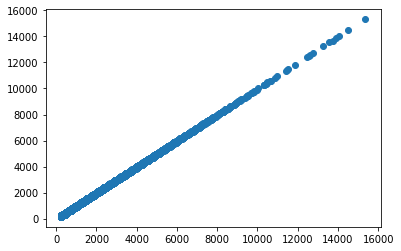

In [39]:
metric = 'duration'
y_true = all_events_df_5mins_raw[metric]
y_pred = all_events_df_30mins_raw[metric]
plt.scatter(y_pred, y_true)

In [15]:
metric = 'peak_position_ratio'
y_true = all_events_df_5mins_raw[metric][:13]
y_pred = all_events_df_30mins_raw[metric][:13]
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

0.34828353565100273

In [40]:
results = []

for metric in raw_cols:
    y_true = all_events_df_5mins_raw[metric]
    y_pred = all_events_df_30mins_raw[metric]
    
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    ks_statistic, p_value = ks_2samp(y_true, y_pred)
    
    results.append({'Metric': metric, 'mean_5mins': y_true.mean() , 'mean_30mins': y_pred.mean(),  'MAE': mae, 'MAPE': mape, 
                    'RMSE': rmse,"KS Statistic" : ks_statistic, "p-value" : p_value})

results_df = pd.DataFrame(results)

In [51]:
metric = 'D50'
y_true = all_events_df_5mins_raw[metric][:1500]
y_pred = all_events_df_30mins_raw[metric][:1500]
print(np.min(y_true), np.min(y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
mape

5.607186993056346e-16 0.2739928909952633


21231255386175.47

In [52]:
results_df

,Metric,mean_5mins,mean_30mins,MAE,MAPE,RMSE,KS Statistic,p-value
0,duration,851.353,907.213,55.859,0.123,60.956,0.124,0.000
1,I30,0.067,0.082,0.019,0.331,0.040,0.137,0.000
2,time_to_peak,408.386,393.620,141.220,47875261755814560.000,350.064,0.119,0.000
3,peak_position_ratio,0.474,0.417,0.170,57979309200979.750,0.285,0.122,0.000
4,third_ppr,0.942,0.805,0.402,541041600582998.562,0.798,0.098,0.000
5,std,0.108,0.776,0.668,6.807,1.046,0.821,0.000
6,max_intensity,0.712,2.471,1.759,3.489,3.059,0.620,0.000
7,mean_intensity,0.063,0.663,0.600,9.793,1.155,0.869,0.000
8,min_intensity,0.003,0.054,0.050,53827700300861.133,0.537,0.226,0.000
9,cv,2.042,1.299,0.768,0.316,1.120,0.317,0.000


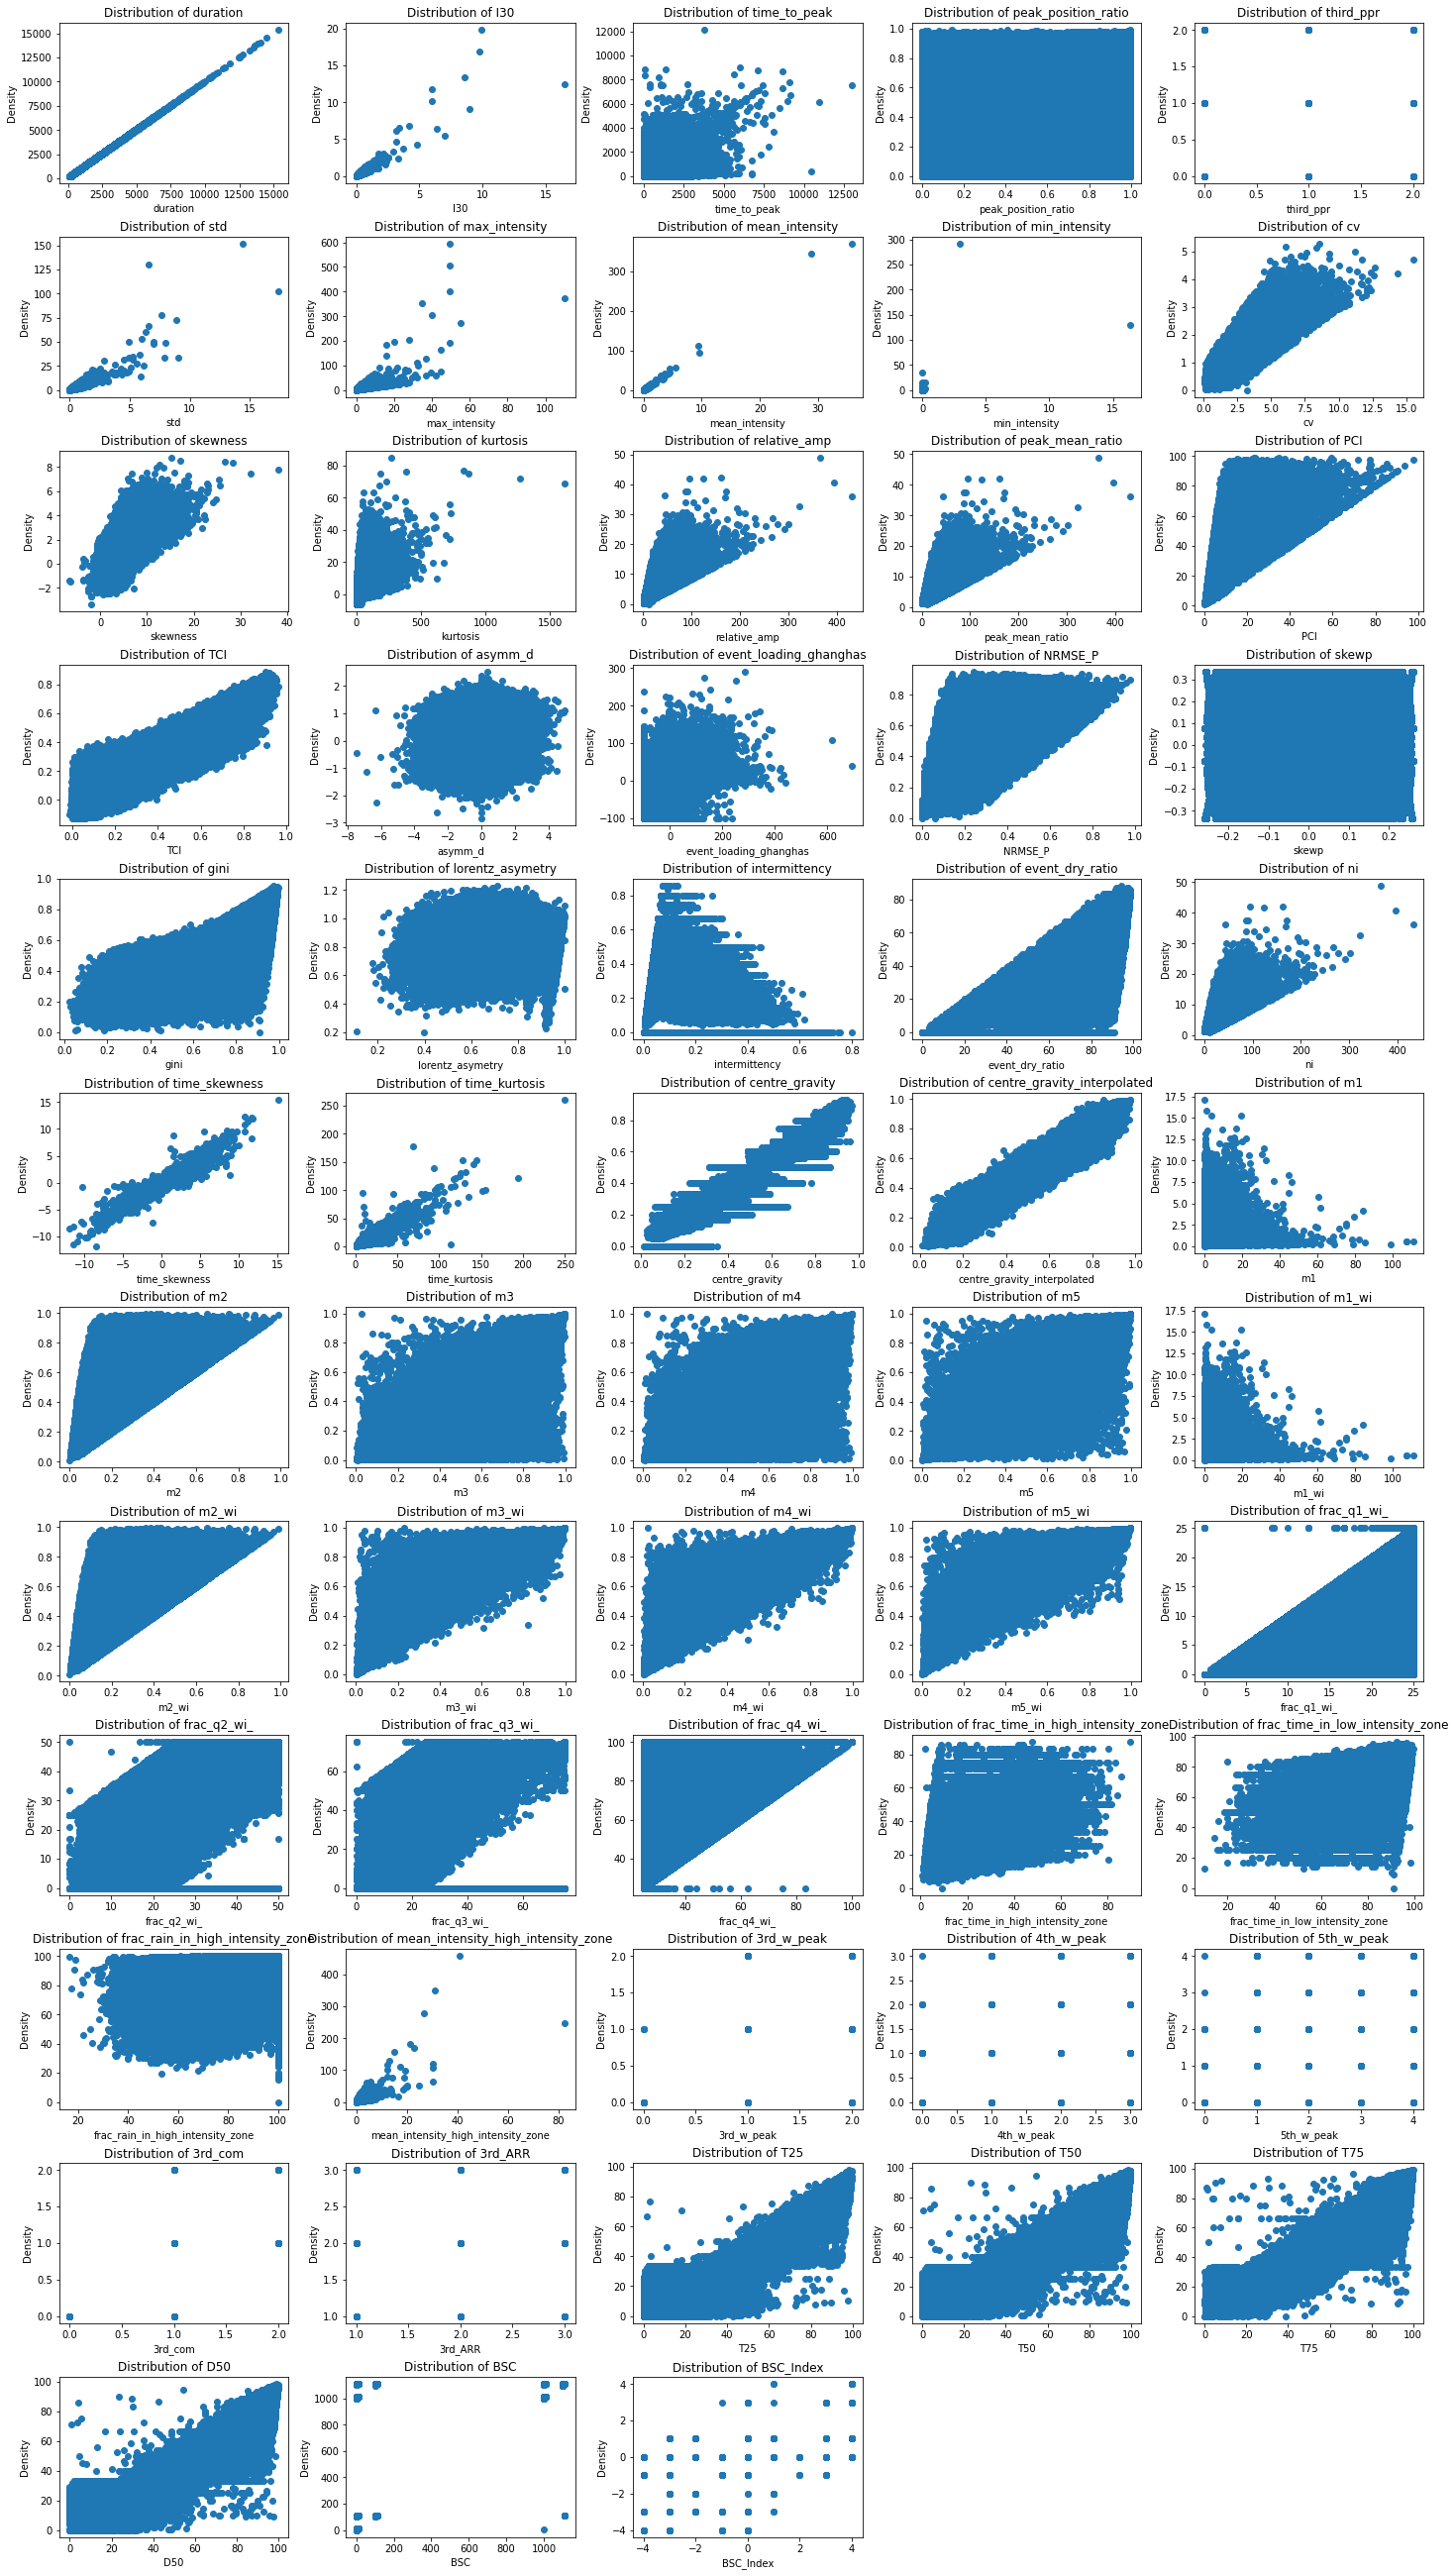

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    ax.scatter(all_events_df_5mins_raw[metric], all_events_df_30mins_raw[metric])
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()


In [43]:
all_events_df_30mins_raw[all_events_df_30mins_raw["mean_intensity"]>300]

,duration,I30,time_to_peak,peak_position_ratio,third_ppr,std,max_intensity,mean_intensity,min_intensity,cv,...,4th_w_peak,5th_w_peak,3rd_com,3rd_ARR,T25,T50,T75,D50,BSC,BSC_Index
21242,4860,11.773,3600.000,0.741,2,9.477,353.200,344.832,290.800,0.027,...,1,1,0,2,23.847,49.605,74.727,49.605,1111,0
362402,420,16.833,60.000,0.143,0,130.239,505.000,368.429,128.700,0.353,...,1,1,0,2,17.070,40.636,65.687,40.636,1111,0


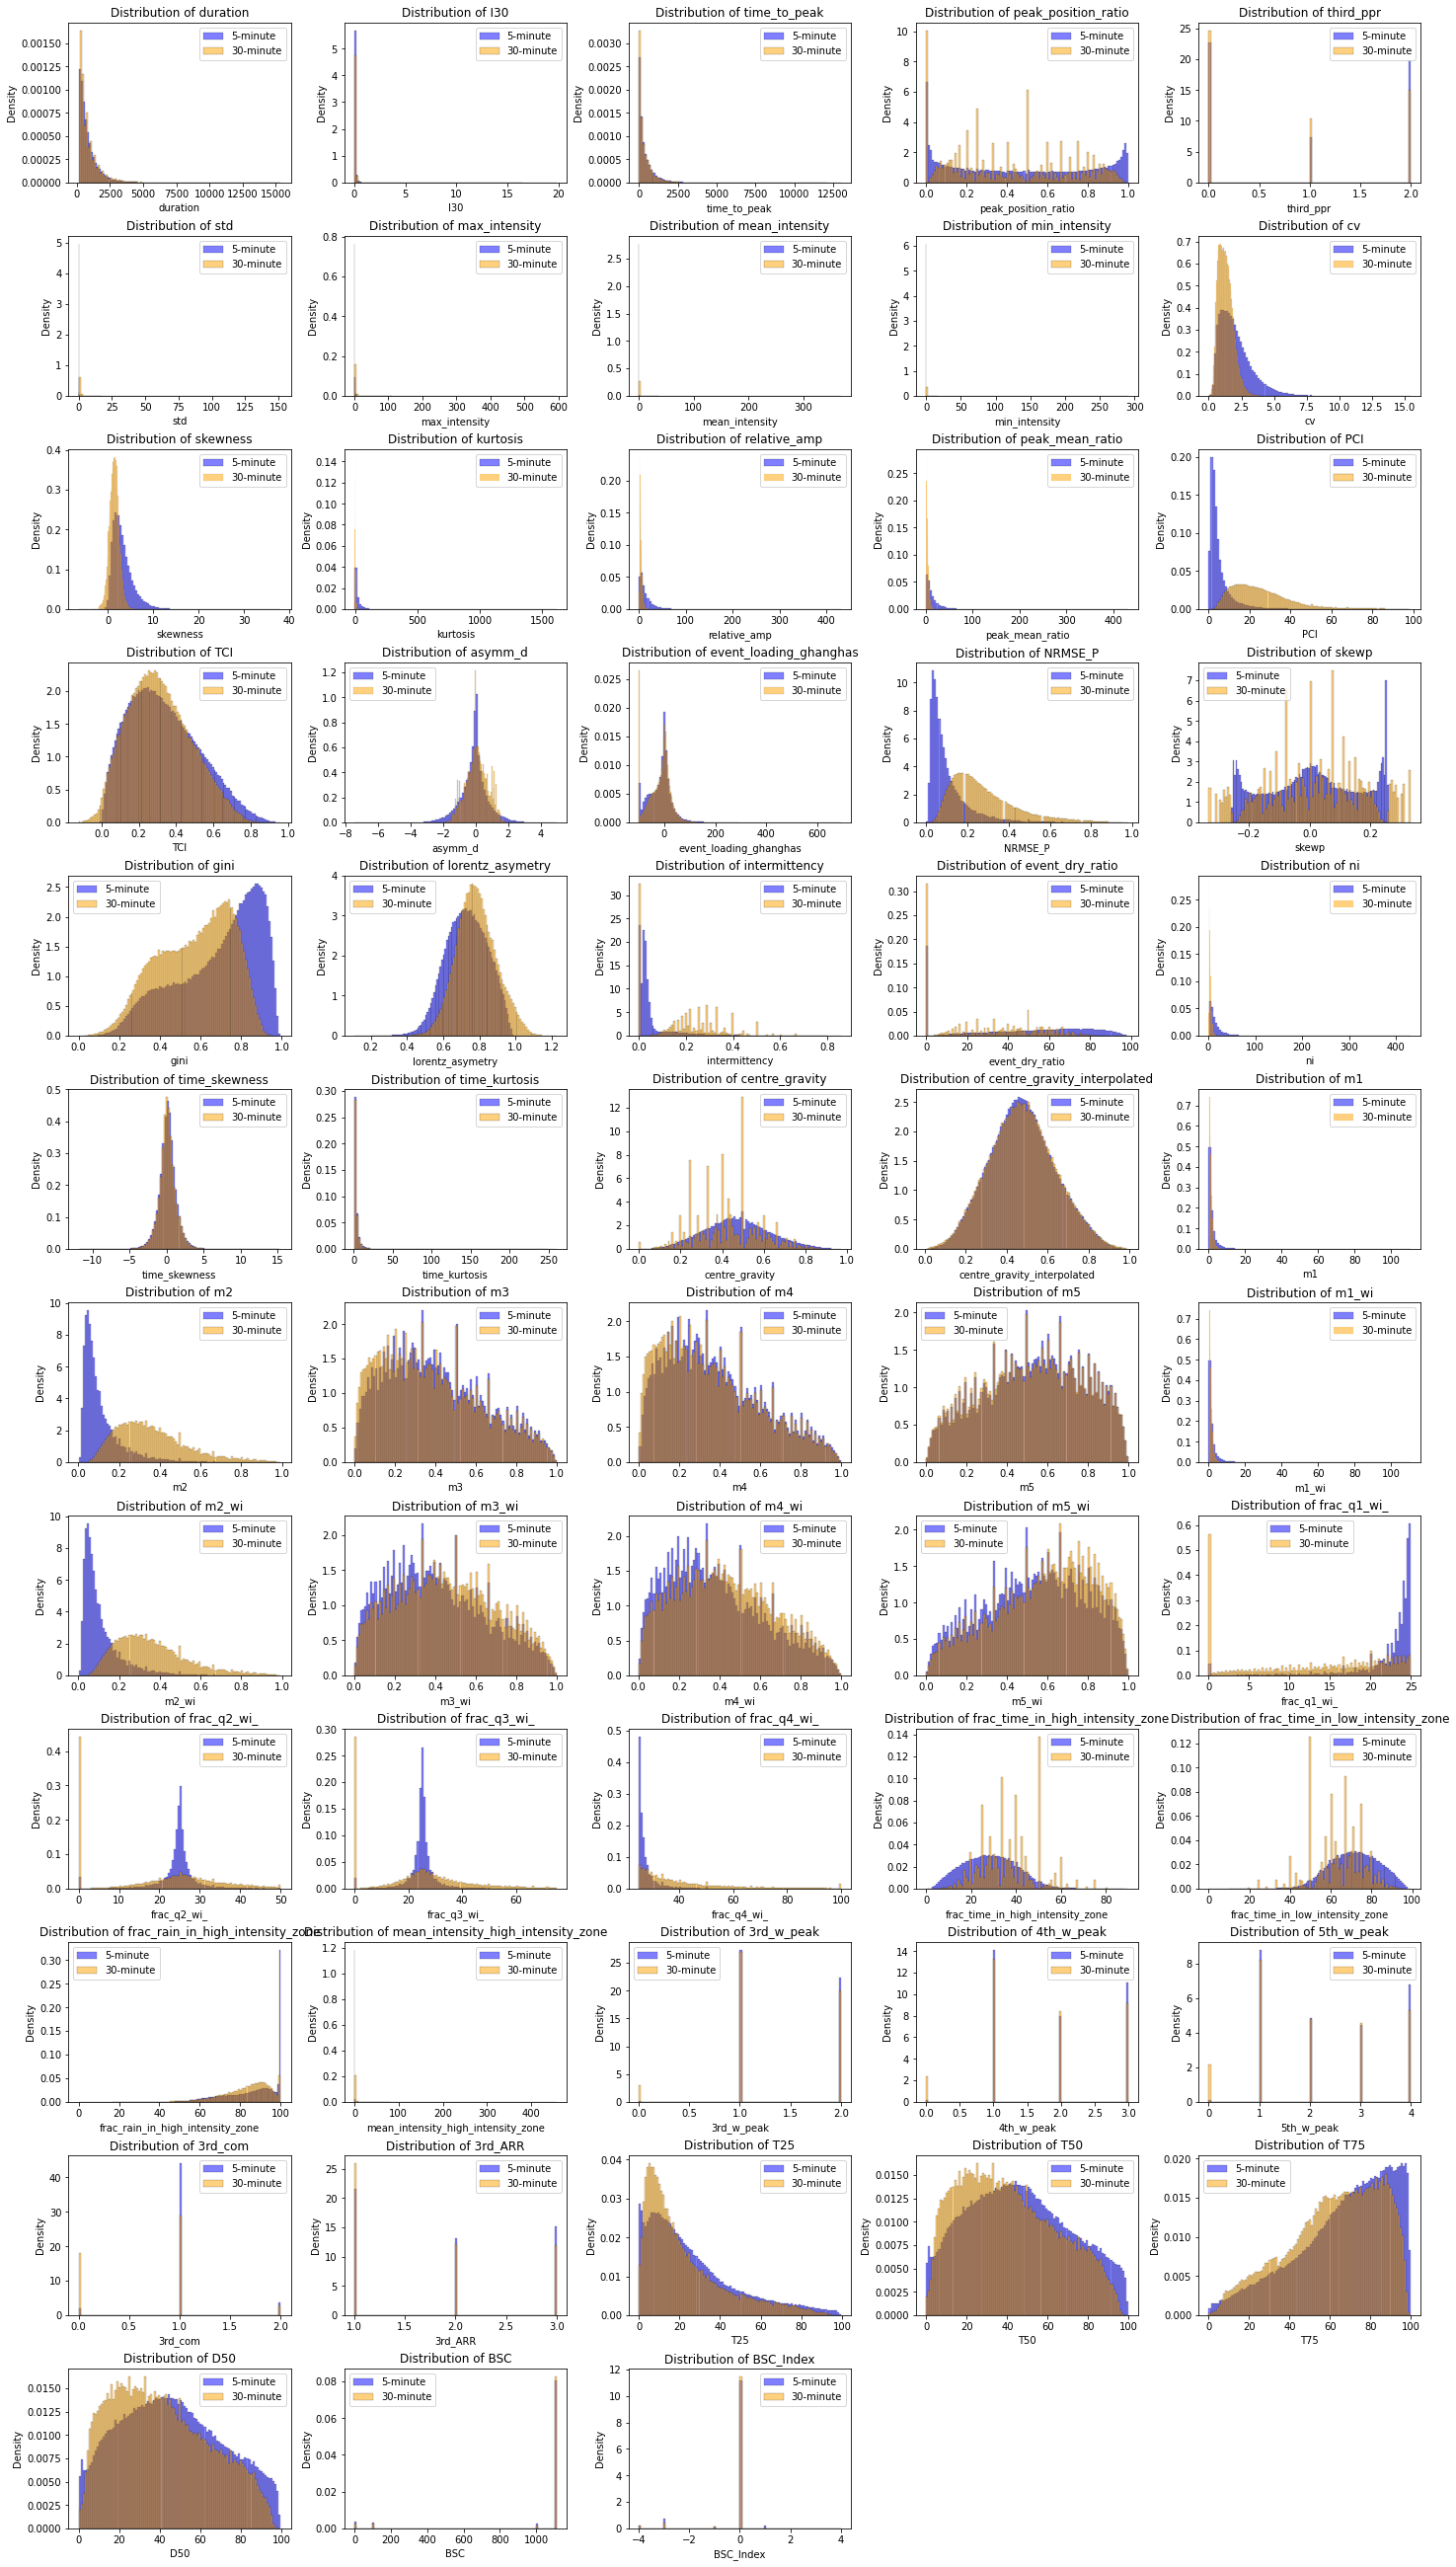

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Plot the histogram for the 5-minute data
    sns.histplot(
        data=all_events_df_5mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='blue',
        label='5-minute',
        ax=ax
    )
    
    # Plot the histogram for the 30-minute data
    sns.histplot(
        data=all_events_df_30mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='orange',
        label='30-minute',
        ax=ax
    )
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()


KeyError: 'event_num'

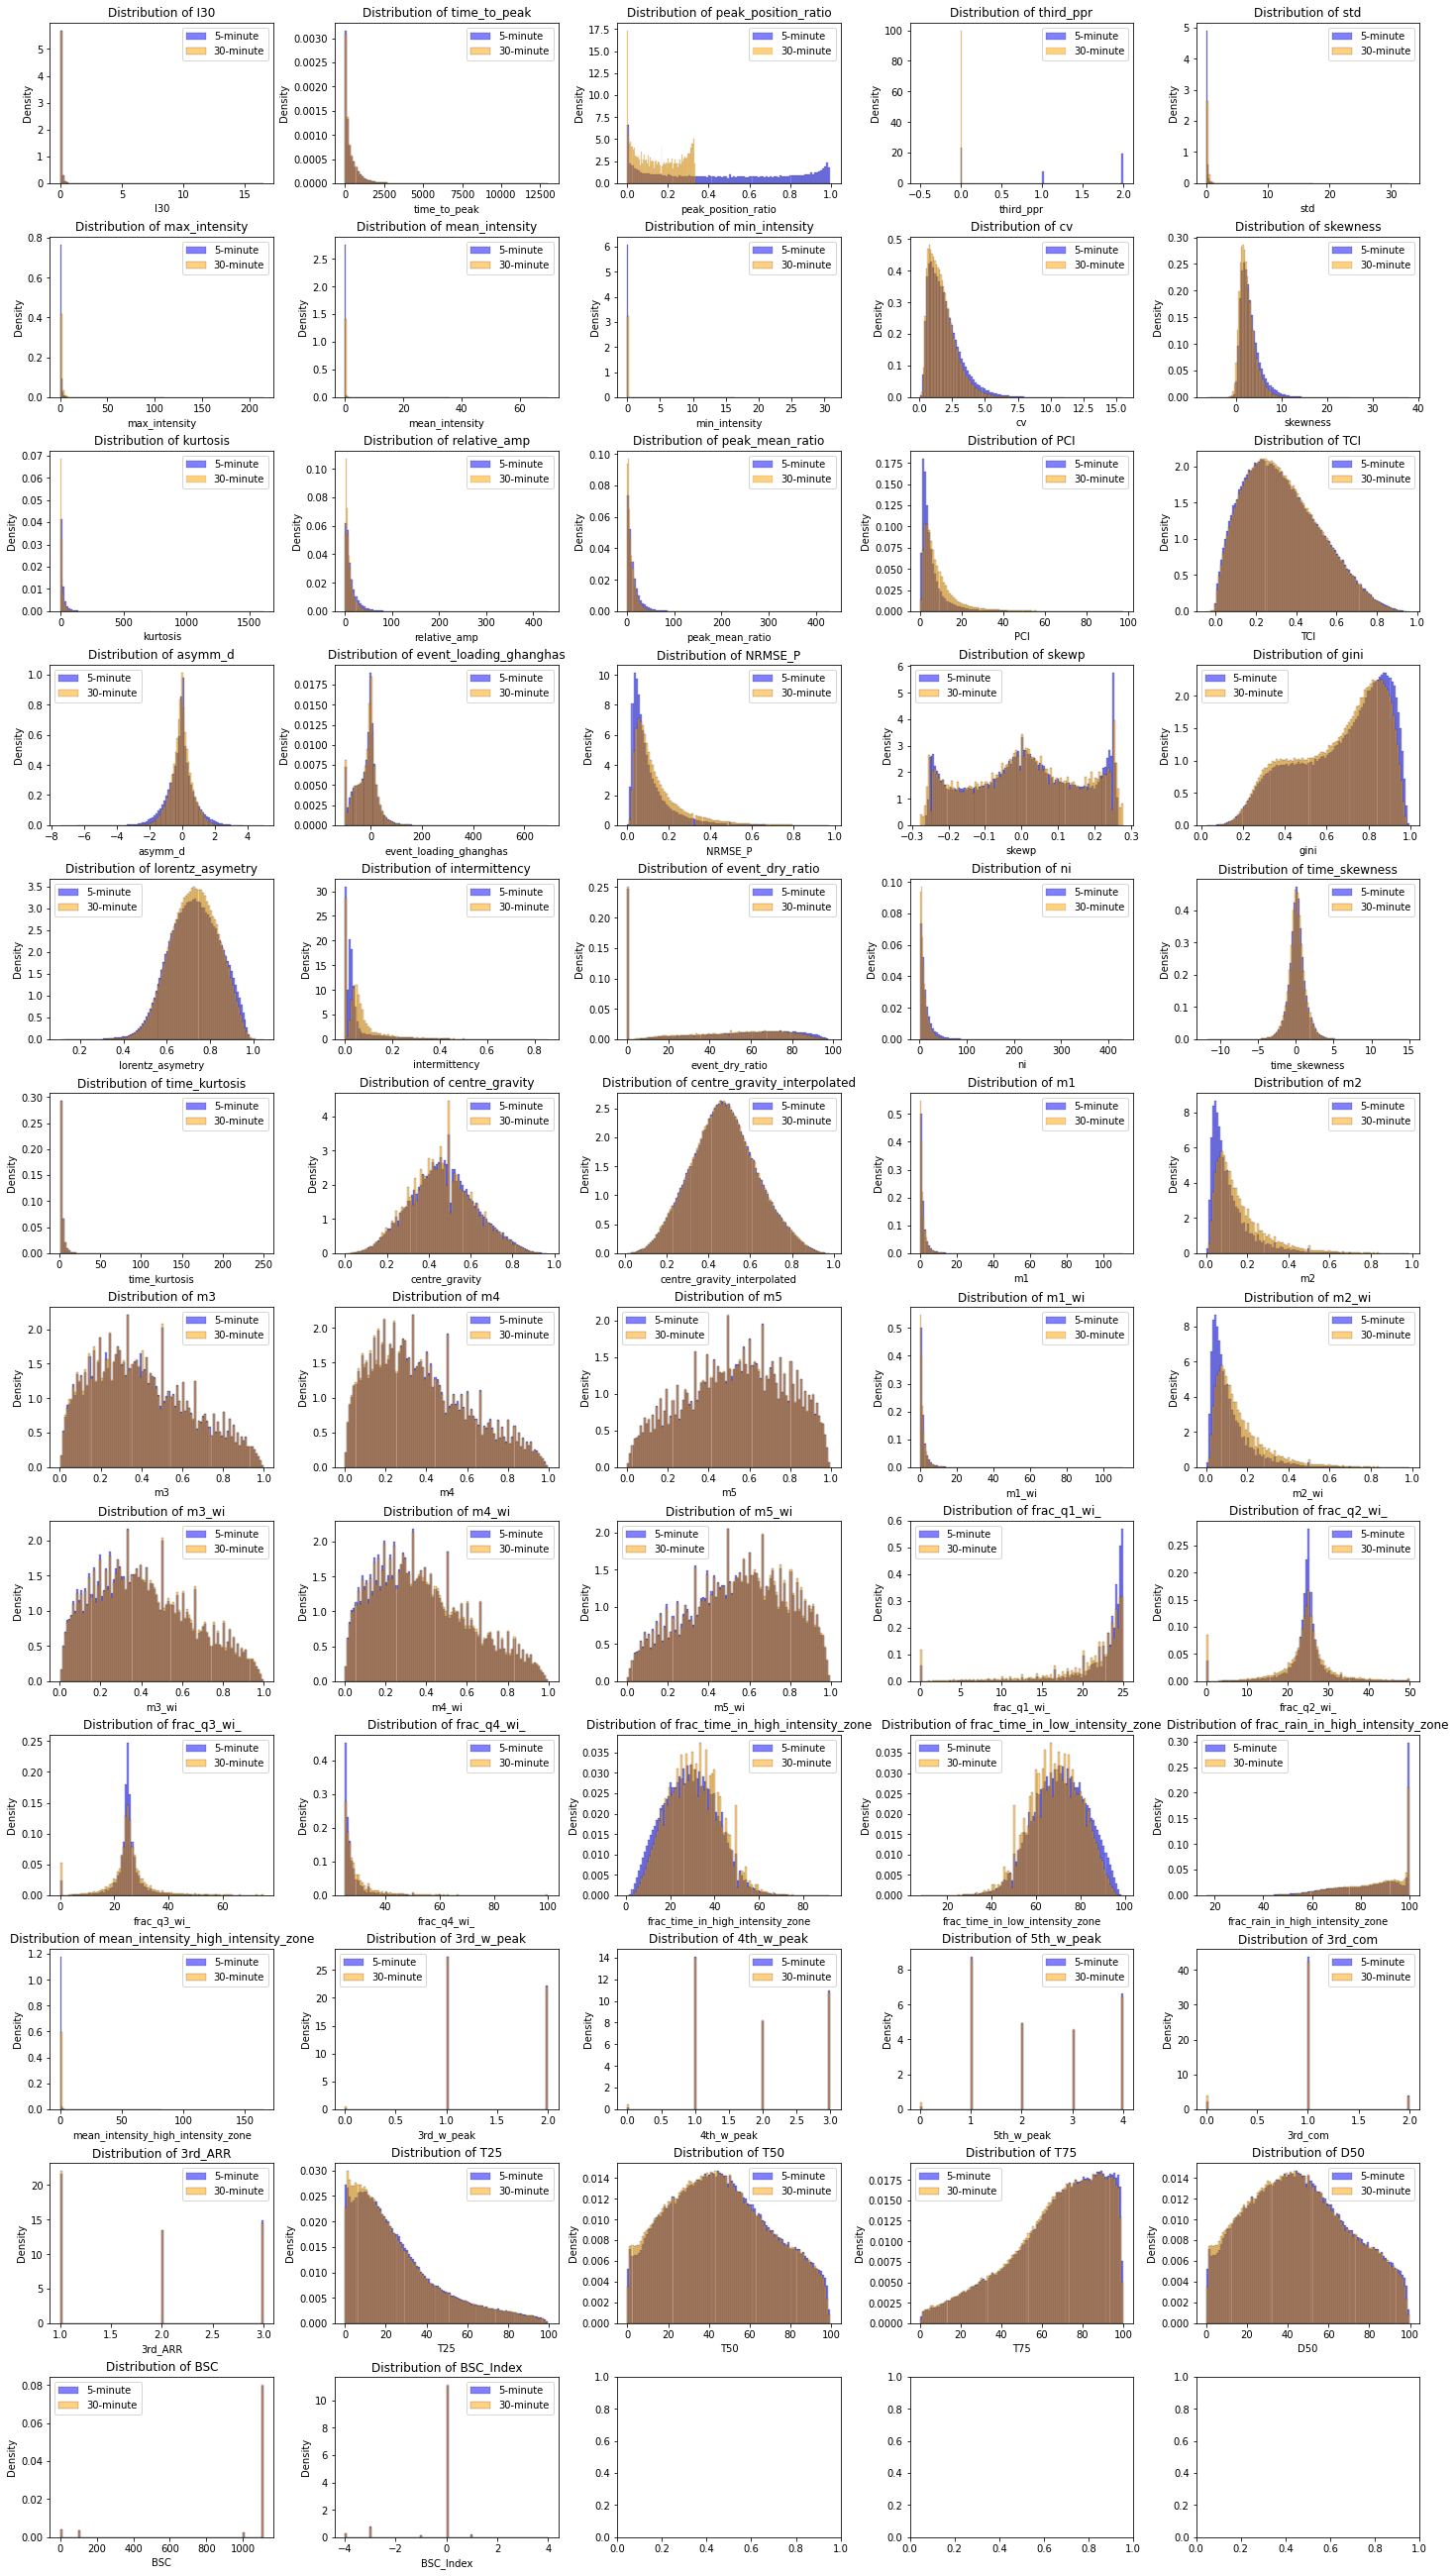

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = raw_cols # Adjust this list as needed

# Determine the number of rows and columns for the subplot grid
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(len(metrics) / n_cols))  # Calculate the required number of rows

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3), constrained_layout=True)
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each metric and create the corresponding subplot
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    
    # Plot the histogram for the 5-minute data
    sns.histplot(
        data=all_events_df_5mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='blue',
        label='5-minute',
        ax=ax
    )
    
    # Plot the histogram for the 30-minute data
    sns.histplot(
        data=all_events_df_30mins_raw[metric],
        stat='density',
        bins=100,
        alpha=0.5,
        color='orange',
        label='30-minute',
        ax=ax
    )
    
    # Set the title and labels
    ax.set_title(f'Distribution of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Density')
    ax.legend()

# Hide any unused subplots
for idx in range(len(metrics), len(axes)):
    fig.delaxes(axes[idx])

# Display the plot
plt.show()
